btc: out of 1116 days, 85.37% of time the funding rate is positive.


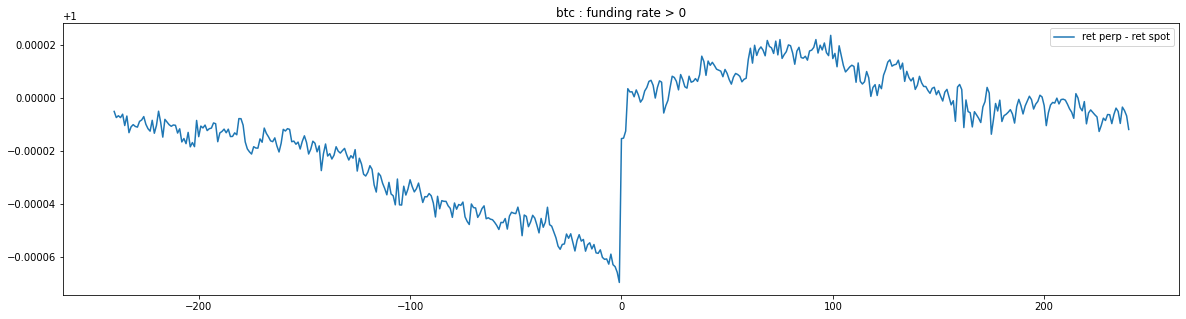

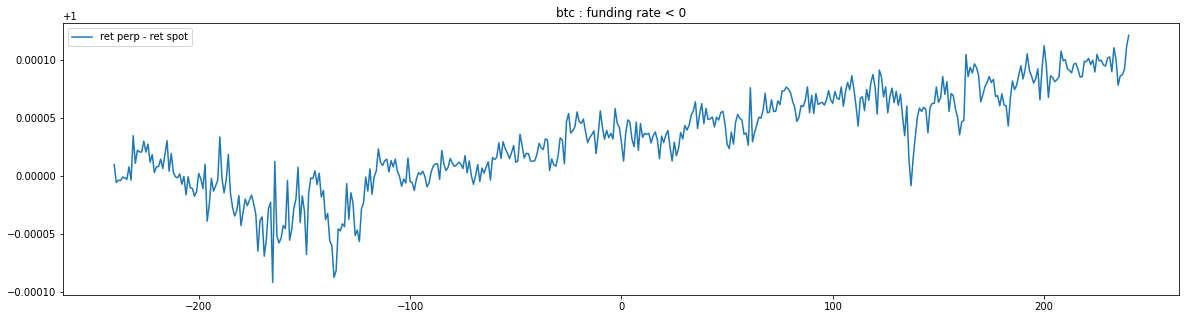

eth: out of 1038 days, 88.12% of time the funding rate is positive.


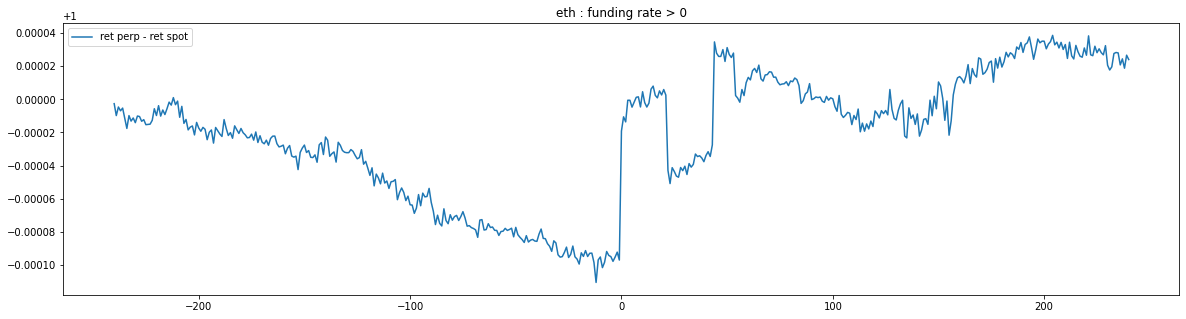

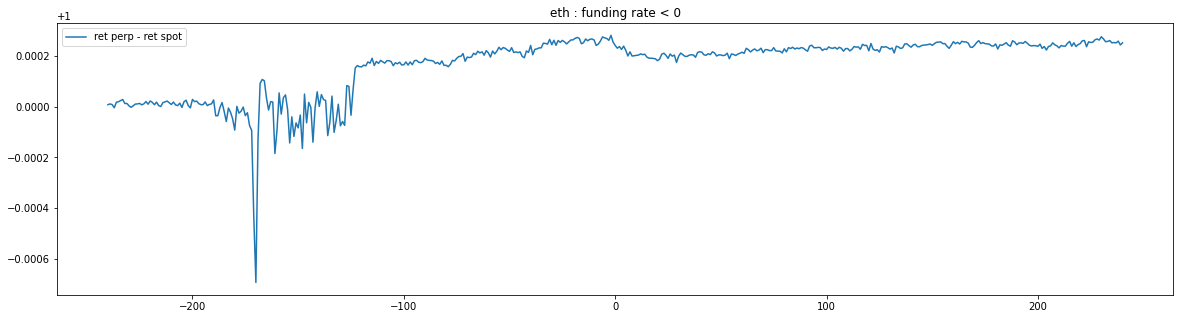

doge: out of 812 days, 83.55% of time the funding rate is positive.


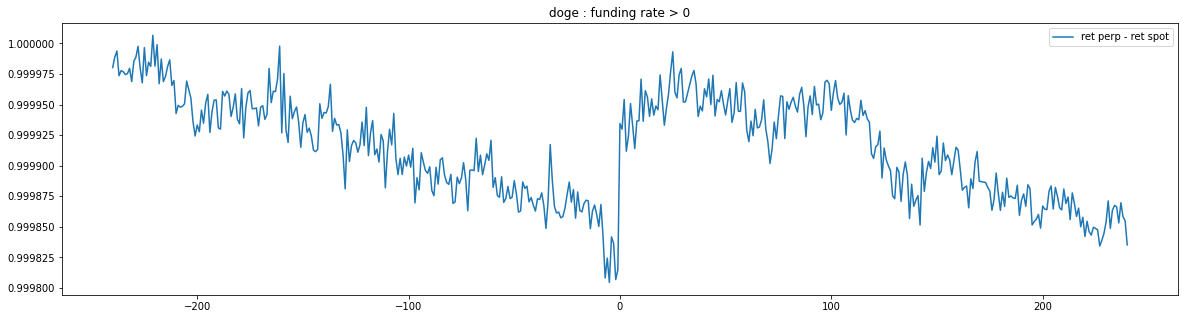

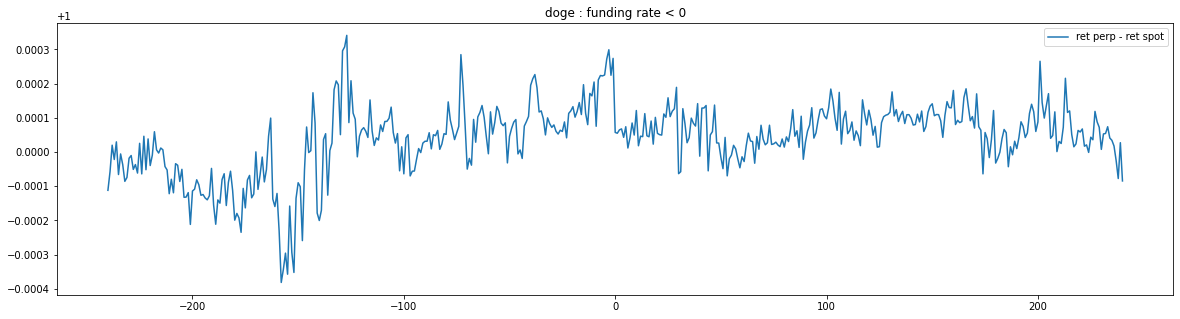

In [340]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

currency_lst = ['btc', 'eth', 'doge']

for currency in currency_lst:
    fund = pd.read_csv(f'data/rate_{currency}_usdt.csv')
    df_perp = pd.read_csv(f'data/perp_{currency}_usdt_1m.csv')
    df_spot = pd.read_csv(f'data/spot_{currency}_usdt_1m.csv')

    df_spot['ret'] = df_spot['close'] / df_spot['close'].shift(1) - 1
    df_perp['ret'] = df_perp['close'] / df_perp['close'].shift(1) - 1

    df = pd.merge(df_spot[['epoch', 'timestamp', 'close', 'ret']], df_perp[['epoch', 'close', 'ret']], on = 'epoch')
    df.columns = ['epoch', 'timestamp', 'clsoe_spot', 'ret_spot', 'close_perp', 'ret_perp']
    df = df.dropna().reset_index(drop = True)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = pd.merge(df, fund[['epoch', 'funding_rate']], on = 'epoch', how = 'left')
    df = df[df['epoch'] >= fund['epoch'].min()].reset_index(drop = True)

    df['ret_perp_spot'] = df['ret_perp'] - df['ret_spot']
    df['n'] = df['epoch'] / 60 // (60 * 8) 
    df['intra_n'] = df['epoch'] / 60 % (60 * 8)

    df_pos = pd.DataFrame()
    df_neg = pd.DataFrame()
    for i in range(len(fund)):
    #     if i % 300 == 0:
    #         print(i)
        df_ = df[(df['epoch'] >= fund.iloc[i,:].epoch - 240*60) & (df['epoch'] < fund.iloc[i,:].epoch + 240 * 60)]
        if fund.iloc[i, :].funding_rate > 0: #np.percentile(fund['funding_rate'], 50):
            df_pos = df_pos.append(df_)
        elif fund.iloc[i, :].funding_rate < 0: #np.percentile(fund['funding_rate'], 50):
            df_neg = df_neg.append(df_)

    def event_study(y, df, title = ''):

        df_n = df.groupby('intra_n').mean()[y].reset_index()
        df_n2 = df_n.copy()
        df_n2['intra_n'] = df_n2['intra_n'] - 480
        df_n = df_n2.append(df_n)
        df_n = df_n[abs(df_n['intra_n']) <= 240]
        df_n['cum_ret'] = (1 + df_n[y]).cumprod()

        fig, ax = plt.subplots(figsize = (20, 5))
        ax.plot(df_n['intra_n'], df_n['cum_ret'], label = 'ret perp - ret spot')
        plt.title(f'{currency} {title}')
        plt.legend()
        plt.show()

        return df_n

    prop_pos = len(fund[fund['funding_rate'] > 0]) / len(fund)
    prop_neg = len(fund[fund['funding_rate'] < 0]) / len(fund)

    print(f'{currency}: out of {len(fund)//3} days, {round(100*prop_pos, 2)}% of time the funding rate is positive.')

    s2 = event_study('ret_perp_spot', df_pos, ': funding rate > 0')
    s1 = event_study('ret_perp_spot', df_neg, ': funding rate < 0')

btc: out of 1116 days, 85.37% of time the funding rate is positive.


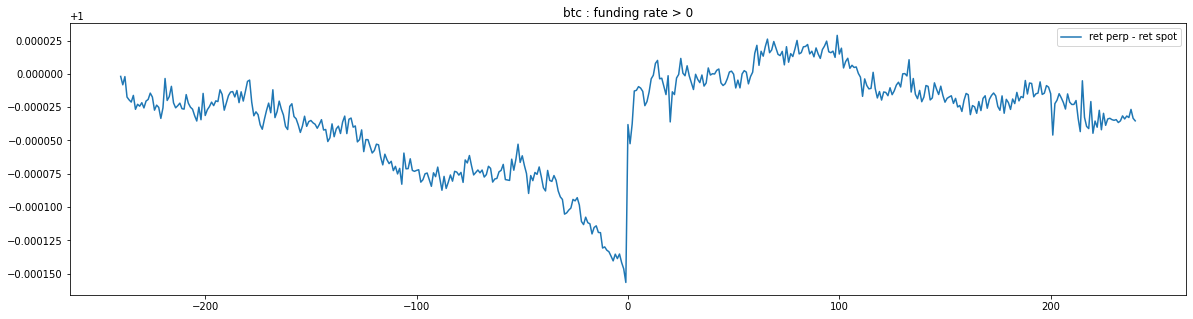

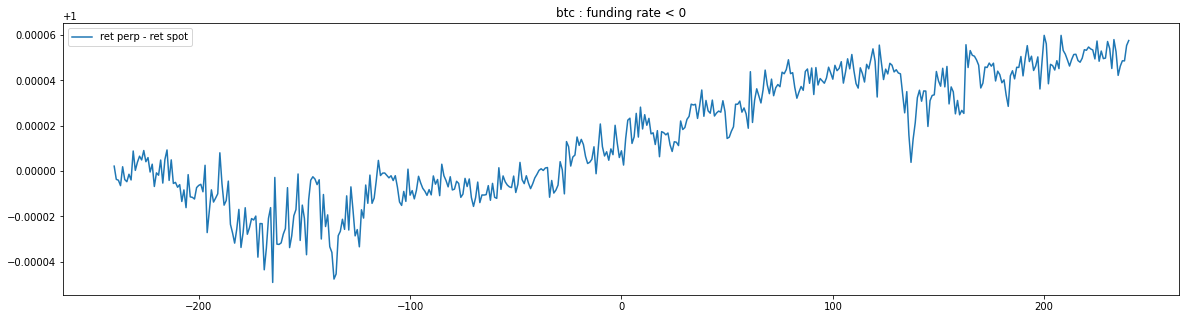

eth: out of 1038 days, 88.12% of time the funding rate is positive.


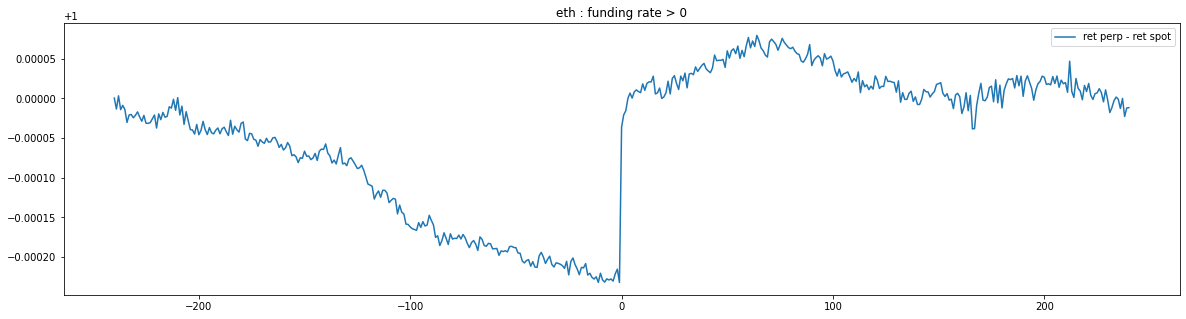

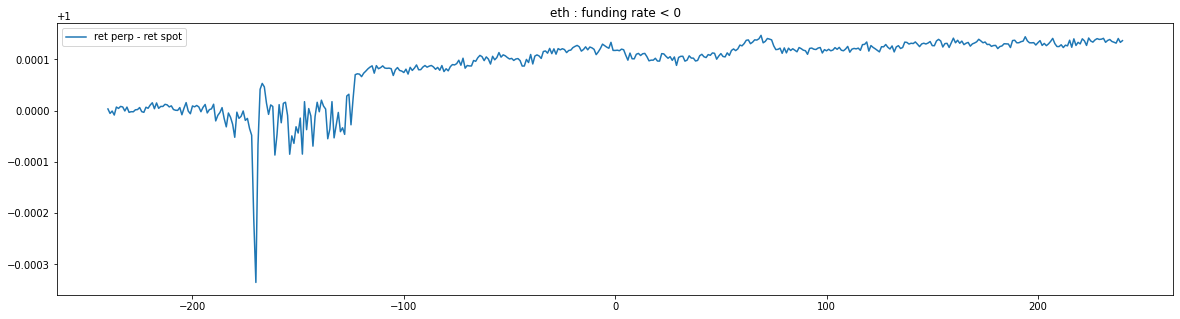

doge: out of 812 days, 83.55% of time the funding rate is positive.


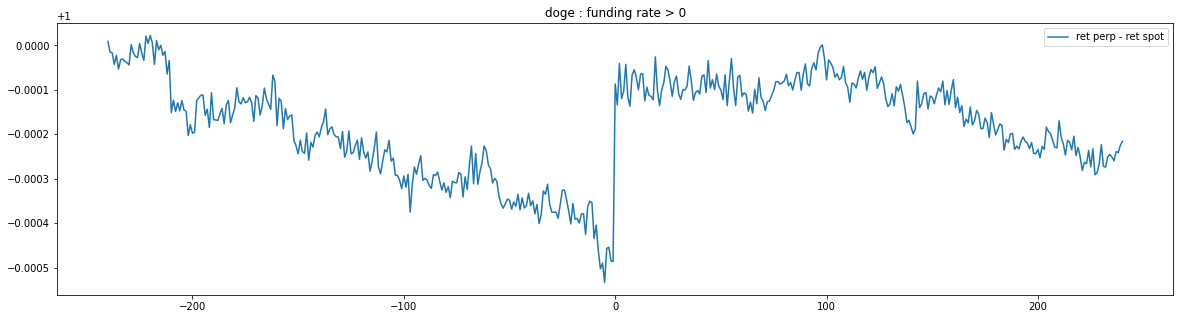

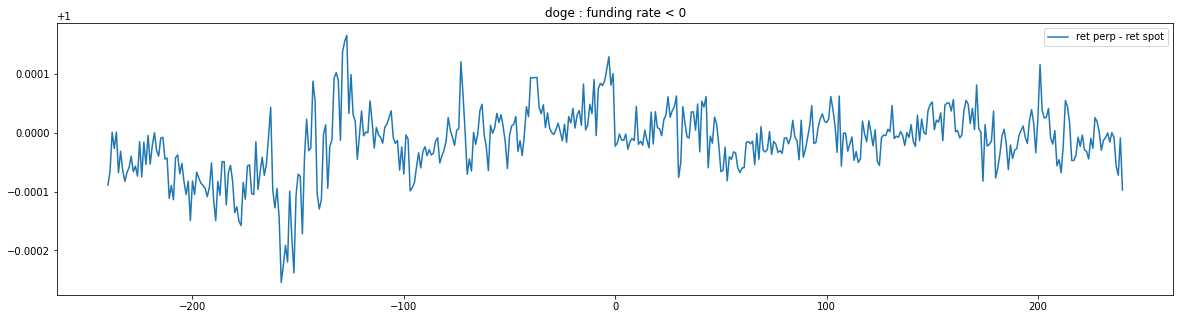

In [346]:
# currency = 'eth'
for currency in currency_lst:
    fund = pd.read_csv(f'data/rate_{currency}_usdt.csv')
    df_perp = pd.read_csv(f'data/perp_{currency}_usdt_1m.csv')
    df_spot = pd.read_csv(f'data/spot_{currency}_usdt_1m.csv')

    df_spot['ret'] = df_spot['close'] / df_spot['close'].shift(1) - 1
    df_perp['ret'] = df_perp['close'] / df_perp['close'].shift(1) - 1

    df = pd.merge(df_spot[['epoch', 'timestamp', 'close', 'ret']], df_perp[['epoch', 'close', 'ret']], on = 'epoch')
    df.columns = ['epoch', 'timestamp', 'clsoe_spot', 'ret_spot', 'close_perp', 'ret_perp']
    df = df.dropna().reset_index(drop = True)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = pd.merge(df, fund[['epoch', 'funding_rate']], on = 'epoch', how = 'left')
    df = df[df['epoch'] >= fund['epoch'].min()].reset_index(drop = True)

    df['ret_perp_spot'] = df['ret_perp'] - df['ret_spot']
    df['n'] = df['epoch'] / 60 // (60 * 8) 
    df['intra_n'] = df['epoch'] / 60 % (60 * 8)

    df_pos = pd.DataFrame()
    df_neg = pd.DataFrame()
    for i in range(len(fund)):
    #     if i % 300 == 0:
    #         print(i)
        df_ = df[(df['epoch'] >= fund.iloc[i,:].epoch - 240*60) & (df['epoch'] < fund.iloc[i,:].epoch + 240 * 60)]
        if fund.iloc[i, :].funding_rate > np.percentile(fund['funding_rate'], 50): #np.percentile(fund['funding_rate'], 50):
            df_pos = df_pos.append(df_)
        elif fund.iloc[i, :].funding_rate < np.percentile(fund['funding_rate'], 50): #np.percentile(fund['funding_rate'], 50):
            df_neg = df_neg.append(df_)

    def event_study(y, df, title = ''):

        df_n = df.groupby('intra_n').mean()[y].reset_index()
        df_n2 = df_n.copy()
        df_n2['intra_n'] = df_n2['intra_n'] - 480
        df_n = df_n2.append(df_n)
        df_n = df_n[abs(df_n['intra_n']) <= 240]
        df_n['cum_ret'] = (1 + df_n[y]).cumprod()

        fig, ax = plt.subplots(figsize = (20, 5))
        ax.plot(df_n['intra_n'], df_n['cum_ret'], label = 'ret perp - ret spot')
        plt.title(f'{currency} {title}')
        plt.legend()
        plt.show()

        return df_n

    prop_pos = len(fund[fund['funding_rate'] > 0]) / len(fund)
    prop_neg = len(fund[fund['funding_rate'] < 0]) / len(fund)

    print(f'{currency}: out of {len(fund)//3} days, {round(100*prop_pos, 2)}% of time the funding rate is positive.')

    s2 = event_study('ret_perp_spot', df_pos, ': funding rate > 0')
    s1 = event_study('ret_perp_spot', df_neg, ': funding rate < 0')